In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [35]:
data = pd.read_csv("./data/gemstone.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [37]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [38]:
data = data.drop(labels=['id'], axis=1)

In [39]:
data.duplicated().sum()

0

In [40]:
data.dtypes!=None

carat      True
cut        True
color      True
clarity    True
depth      True
table      True
x          True
y          True
z          True
price      True
dtype: bool

In [41]:
data.dtypes!='object'

carat       True
cut        False
color      False
clarity    False
depth       True
table       True
x           True
y           True
z           True
price       True
dtype: bool

In [42]:
data.columns[data.dtypes!='object']

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [43]:
numeric_column = data.columns[data.dtypes!='object']
categorical_column = data.columns[data.dtypes=='object']

In [44]:
categorical_column

Index(['cut', 'color', 'clarity'], dtype='object')

In [45]:
numeric_column

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [46]:
data['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [47]:
data['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [48]:
data.shape

(193573, 10)

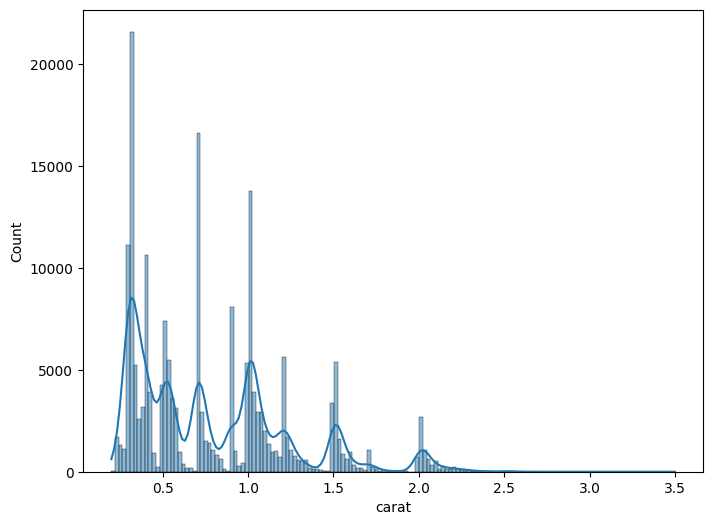

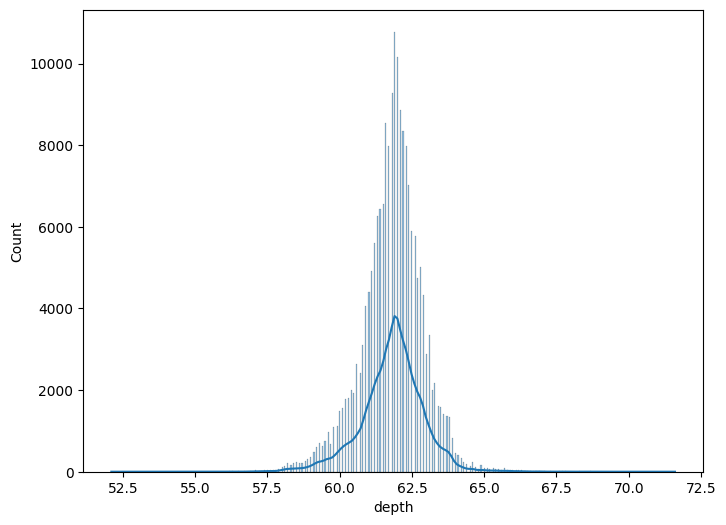

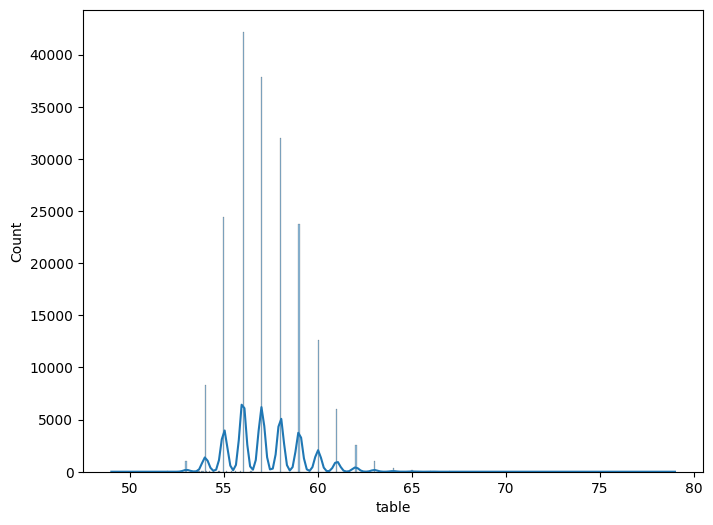

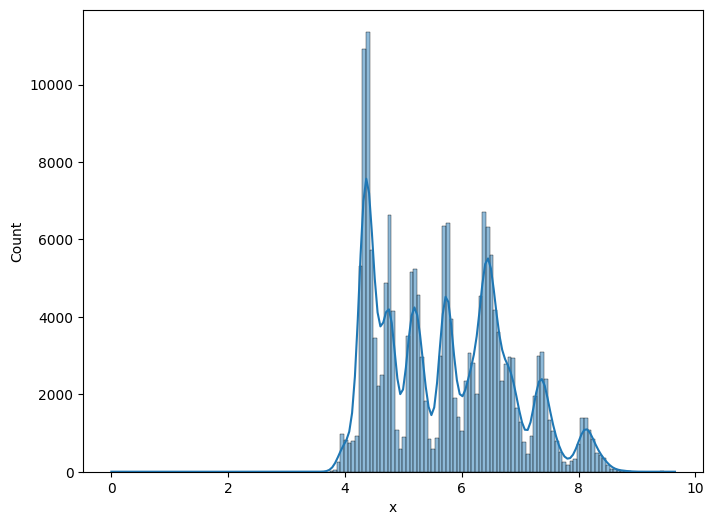

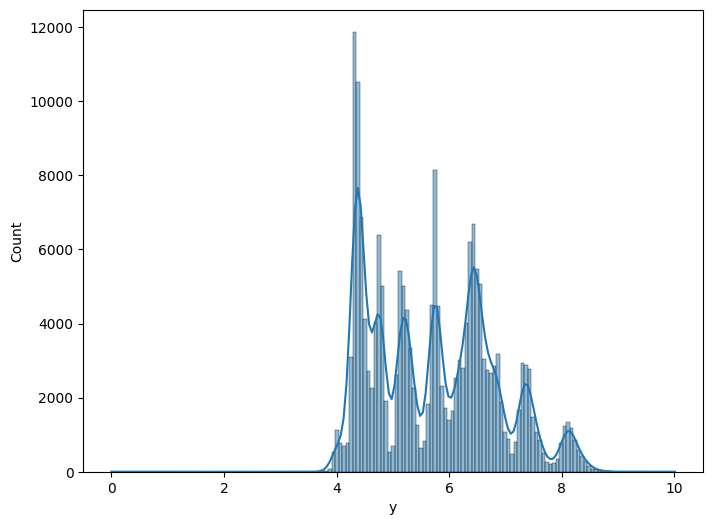

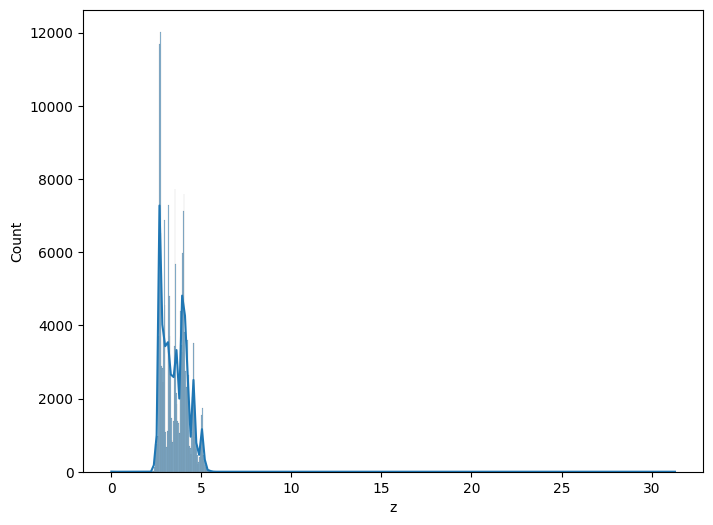

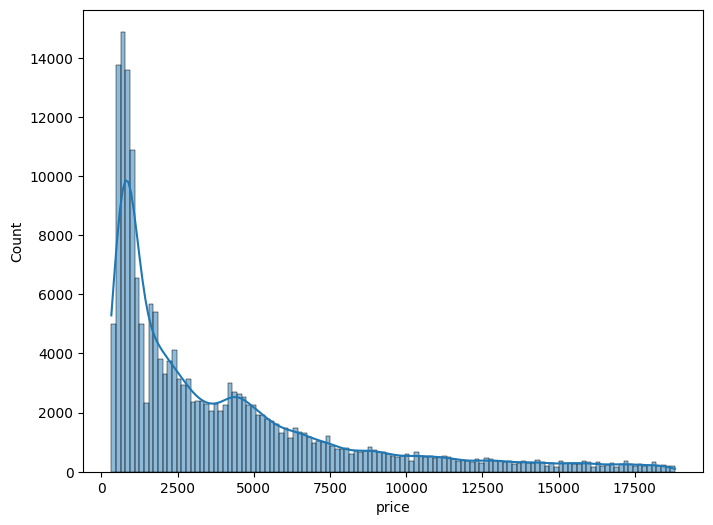

In [49]:
for i in numeric_column:
  plt.figure(figsize=(8,6))
  sns.histplot(data=data, x=i,kde=True)
  plt.show

In [50]:
data_num= data[numeric_column]
data_cat= data[categorical_column]

<Axes: >

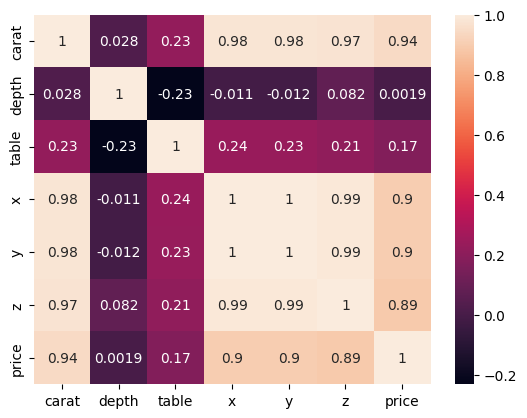

In [51]:

sns.heatmap(data_num.corr(), annot = True)

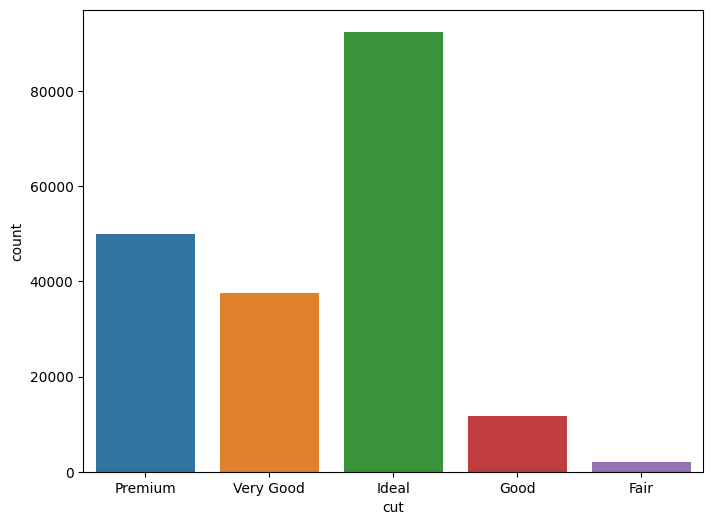

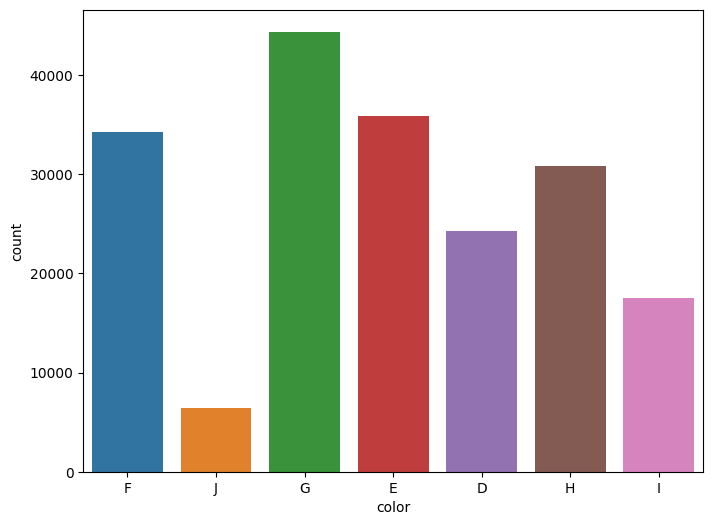

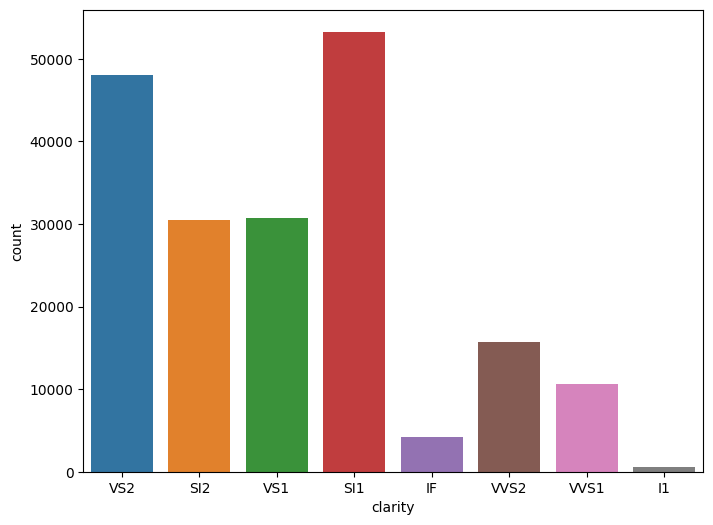

In [52]:
for i in categorical_column:
  plt.figure(figsize=(8,6))
  sns.countplot(data=data,x=i)
  plt.show

In [53]:
data_cat['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [54]:
color_map={'F':5, 'J':1, 'G':4, 'E':6, 'D':7, 'H':3, 'I':2}

In [55]:
data_cat['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [56]:
clarity_map={'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1':1}

In [57]:
data_cat['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [58]:
cut_map={'Ideal':5,'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}

In [59]:
data_2 = data.copy()

In [60]:
data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)
data['color'] = data['color'].map(color_map)

In [61]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [63]:
data.to_csv("./data/cleandata.csv", index=False)